In [1]:
import torch
import copy

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import numpy as np
import glob, os
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

from torch import nn, optim

import torch.nn.functional as F

In [2]:
torch.__version__

'1.7.1'

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
dir = './datasets/fsm/seq/*'
os.getcwd()

'/home/laurine/Téléchargements/Frequent-Subgraph-Mining-Using-Deep-Learning-master'

In [4]:
print(dir)

./datasets/fsm/seq/*


In [5]:
alpha = list(string.ascii_uppercase)
chr2index = {alpha[i]:i for i in range(len(alpha))}

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [7]:
def chr2OH(alphabet):
    oh = [0 for i in range(len(alpha))]
    index = chr2index[alphabet]
    oh[index] = 1
    return oh


In [8]:
# file read
all_names = []
all_data = []
sequence_length = []
alpha = list(string.ascii_uppercase)
data_length = len(glob.glob(dir))
file_predix = './datasets/fsm/seq'
files = glob.glob(dir)


In [9]:
files = glob.glob(dir)
for file in files:
    datasets = []
    all_names.append(file.split('\\')[-1].replace('.txt', ''))
    for rf in open(file, 'r'):
        (u, v, w) = rf[1:-2].split(', ')
        datasets.append(chr2OH(u[1]) + chr2OH(v[1]) +[float(w)])
        #datasets.append([chr2index[u[1]], chr2index[v[1]], float(w)])
    sequence_length.append(len(datasets))
    all_data.append(datasets)
all_data = np.array([np.array(arr) for arr in all_data])

max_sequence_length = max(sequence_length)
zeros = np.zeros(53)
     

for ind, data in enumerate(all_data):
    if len(data) != max_sequence_length:
        for i in range(len(data), max_sequence_length):
            all_data[ind] = np.vstack([all_data[ind], zeros])

all_d = []
for ind, data in enumerate(all_data):
    all_d.append(data.flatten())
    #all_d[ind] = data.flatten()
    
all_d[0]
all_d = np.array(all_d)
print(type(all_d))
all_d[0]

<class 'numpy.ndarray'>


array([  0.    ,   0.    ,   1.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   1.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   2.1129,   0.    ,
         0.    ,   1.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   1.    ,   0.    ,
         0.    ,   0.    ,   0.    ,   0.    ,   0.    ,   0. 

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [11]:
x_train, x_test, train_name, test_name = train_test_split(all_data, all_names, test_size=0.3)
x_test, x_val, test_name, val_name = train_test_split(x_test, test_name, test_size=0.33)
type(x_train)

numpy.ndarray

In [12]:
tr_names= []
for name in train_name:
    tr_names.append(name.split('graph')[0])
    #tr_names.append(name.split('-')[0].replace('graph', ''))

In [13]:
tr_names[0]

'./datasets/fsm/seq/1'

In [14]:
max_sequence_length = max(sequence_length) #sequence_len
n_features = 3
batch_size = 32
#epochs = 200
epochs = 10
steps_per_epoch = len(x_train) #n_sequence
max_sequence_length

5

In [15]:

def create_dataset_1(nparrays):
    dataset = [torch.tensor(s).unsqueeze(0).float() for s in nparrays]
  #step_per_epoch, seq_len, llen, n_features = torch.stack(dataset).shape
    #n_seq, m ,seq_len, n_features = print(torch.stack(dataset).shape)
    print(torch.stack(dataset).shape)
    n_seq, seq_len, n_features = torch.stack(dataset).shape
    #print( n_seq, m , seq_len, n_features )
    return dataset, seq_len, n_features

In [16]:

def create_dataset_0(nparrays):
    #dataset = [torch.tensor(s).float() for s in nparrays]
  #step_per_epoch, seq_len, llen, n_features = torch.stack(dataset).shape
    dataset = torch.from_numpy(nparrays)
    #n_features  = torch.stack(dataset).shape
    shape_list = list(dataset.shape)
    print("dataset: " , shape_list)
    seq_len = shape_list[1]
    n_features = shape_list[2]
    return dataset, seq_len, n_features

In [17]:
x_train_2d, x_test_2d, train_name_2d, test_name_2d = train_test_split(all_data, all_names, test_size=0.3)
x_test_2d, x_val_2d, test_name_2d, val_name_2d = train_test_split(x_test_2d, test_name_2d, test_size=0.33)

In [18]:
x_train_2d, x_test_2d, train_name_2d, test_name_2d = train_test_split(all_data, all_names, test_size=0.3)
x_test_2d, x_val_2d, test_name_2d, val_name_2d = train_test_split(x_test_2d, test_name_2d, test_size=0.33)
type(x_train_2d)
train_dataset_2d, seq_len_2d, n_features_2d = create_dataset_0(x_train_2d)
val_dataset_2d, _, _ = create_dataset_0(x_val_2d)

print(seq_len_2d)
print(n_features_2d)
print(train_dataset_2d[0])

dataset:  [617, 5, 53]
dataset:  [88, 5, 53]
5
53
tensor([[ 1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000, 10.0133],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
    

In [19]:
x_train_1d , x_test_1d , train_name_1d , test_name_1d = train_test_split(all_d, all_names, test_size=0.3)
x_test_1d , x_val_1d , test_name_1d , val_name_1d  = train_test_split(x_test_1d, test_name_1d, test_size=0.33)
type(x_train_1d )
train_dataset_1d , seq_len_1d , n_features_1d  = create_dataset_1(x_train_1d )
val_dataset_1d , _, _ = create_dataset_1(x_val_1d )
train_dataset_1d[0]
print(seq_len_1d)
print(n_features_1d)

torch.Size([617, 1, 265])
torch.Size([88, 1, 265])
1
265


In [20]:
class Encoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(Encoder, self).__init__()
        
        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = embedding_dim, 2 * embedding_dim
        
        self.rnn1 = nn.LSTM(
          input_size=n_features,
          hidden_size=self.hidden_dim,
          num_layers=1,
          batch_first=True
        )
        self.rnn2 = nn.LSTM(
          input_size=self.hidden_dim,
          hidden_size=embedding_dim,
          num_layers=1,
          batch_first=True
        )
    def forward(self, x):

        x = x.reshape((1, self.seq_len, self.n_features))
        
        x, (_, _) = self.rnn1(x)
        x, (hidden_n, _) = self.rnn2(x)
        
        return hidden_n.reshape((self.seq_len, self.embedding_dim))

In [21]:
class Decoder(nn.Module):
    def __init__(self, seq_len, input_dim=64, n_features=1):
        super(Decoder, self).__init__()
        
        self.seq_len, self.input_dim = seq_len, input_dim
        self.hidden_dim, self.n_features = 2 * input_dim, n_features
       
        self.rnn1 = nn.LSTM(
            input_size=input_dim,
            hidden_size=input_dim,
            num_layers=1,
            batch_first=True
        )
        self.rnn2 = nn.LSTM(
            input_size=input_dim,
            hidden_size=self.hidden_dim,
            num_layers=1,
            batch_first=True
        )
        
        self.output_layer = nn.Linear(self.hidden_dim, n_features)
    def forward(self, x):
        x = x.repeat(self.seq_len, self.n_features)
        x = x.reshape((self.n_features, self.seq_len, self.input_dim))
        
        x, (hidden_n, cell_n) = self.rnn1(x)
        x, (hidden_n, cell_n) = self.rnn2(x)
        x = x.reshape((self.n_features, self.hidden_dim))
        return self.output_layer(x)

In [22]:
class RecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(RecurrentAutoencoder, self).__init__()
        self.encoder = Encoder(seq_len, n_features, embedding_dim).to(device)
        self.decoder = Decoder(seq_len, embedding_dim, n_features).to(device)
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [23]:

model = RecurrentAutoencoder(seq_len_1d  , n_features_1d , 128) #alphabe 26 -> 26  weight 1
model = model.to(device)

In [27]:
class F1_Loss(nn.Module):

    def __init__(self, epsilon=1e-1):
        super().__init__()
        self.epsilon = epsilon
        
    def forward(self, y_pred, y_true):
      
        print(y_pred);
        y_true = y_true.flatten().to(torch.long)
        assert y_pred.ndim == 2
        assert y_true.ndim == 1
        
        y_true = F.one_hot(y_true, 10).to(torch.float64)
        y_pred = F.softmax(y_pred, dim=1)
        tp = (y_true * y_pred).sum(dim=0).to(torch.float64)
        tn = ((1 - y_true) * (1 - y_pred)).sum(dim=0).to(torch.float64)
        fp = ((1 - y_true) * y_pred).sum(dim=0).to(torch.float64)
        fn = (y_true * (1 - y_pred)).sum(dim=0).to(torch.float64)
        
        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)
        f1 = 2* (precision*recall) / (precision + recall + self.epsilon)
        
        print(precision);
        print(recall);
     
        f1 = f1.clamp(min=self.epsilon, max=1-self.epsilon)
        '''
        precision = precision.clamp(min=self.epsilon, max=1-self.epsilon)
        recall = recall.clamp(min=self.epsilon, max=1-self.epsilon)
        '''
        
        '''
        for i in range(len(y_pred_pc)):
            y_pred_pc[i] = round(y_pred_pc[i])
            
        precision_pc = precision_score(y_true_pc, y_pred_pc, average='macro')
        recall_pc = recall_score(y_true_pc, y_pred_pc, average='macro')
        '''
        return 1 - f1.mean(), 1- precision.mean(), 1- recall.mean()
    
f1_loss = F1_Loss().cuda()

In [28]:
def train_model(model, train_dataset, val_dataset, n_epochs):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  #criterion = nn.L1Loss(reduction='sum').to(device)
    criterion = nn.MSELoss(reduction='mean').to(device)
    history = dict(train=[], val=[])
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 10000.0
    
    for epoch in range(1, n_epochs + 1):
        model = model.train()
        
        train_losses = []
        for seq_true in train_dataset:
            optimizer.zero_grad()
            
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)
            
            loss = criterion(seq_pred, seq_true)
            
            loss.backward()
            optimizer.step()
            
        
            train_losses.append(loss.item())
            
        val_losses = []
        model = model.eval()
    
        with torch.no_grad():
            for seq_true in val_dataset:
            
                seq_true = seq_true.to(device)
                seq_pred = model(seq_true)

                loss = criterion(seq_pred, seq_true)
                val_losses.append(loss.item())
            
        train_loss = np.mean(train_losses)
        val_loss = np.mean(val_losses)
    
        history['train'].append(train_loss)
        history['val'].append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
        
        print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')
    
    model.load_state_dict(best_model_wts)
    return model.eval(), history

In [29]:
model, history = train_model(
  model, 
  train_dataset_1d, 
  val_dataset_1d, 
  n_epochs= 100
)

Epoch 1: train loss 0.019265967371658085 val loss 0.021110963614773937
Epoch 2: train loss 0.010708698069699776 val loss 0.01997690244752448
Epoch 3: train loss 0.01393692079467157 val loss 0.020780988753275862
Epoch 4: train loss 1.5561200330909184 val loss 1.2056141508139924
Epoch 5: train loss 0.602420238431485 val loss 0.05810032385158014
Epoch 6: train loss 0.017375714623950787 val loss 0.014860871618359604
Epoch 7: train loss 0.01324157880250677 val loss 0.02419667506050742
Epoch 8: train loss 0.010794371156736293 val loss 0.01626975123839326
Epoch 9: train loss 0.012889018121822261 val loss 0.02492055290151091
Epoch 10: train loss 0.010434626760127285 val loss 0.016819367426003075
Epoch 11: train loss 0.011706716108135501 val loss 0.022419715724853715
Epoch 12: train loss 0.011315754907412493 val loss 0.0179814787420169
Epoch 13: train loss 0.010905850831937344 val loss 0.0231850771775829
Epoch 14: train loss 0.011055271194391541 val loss 0.020331478503067046
Epoch 15: train los

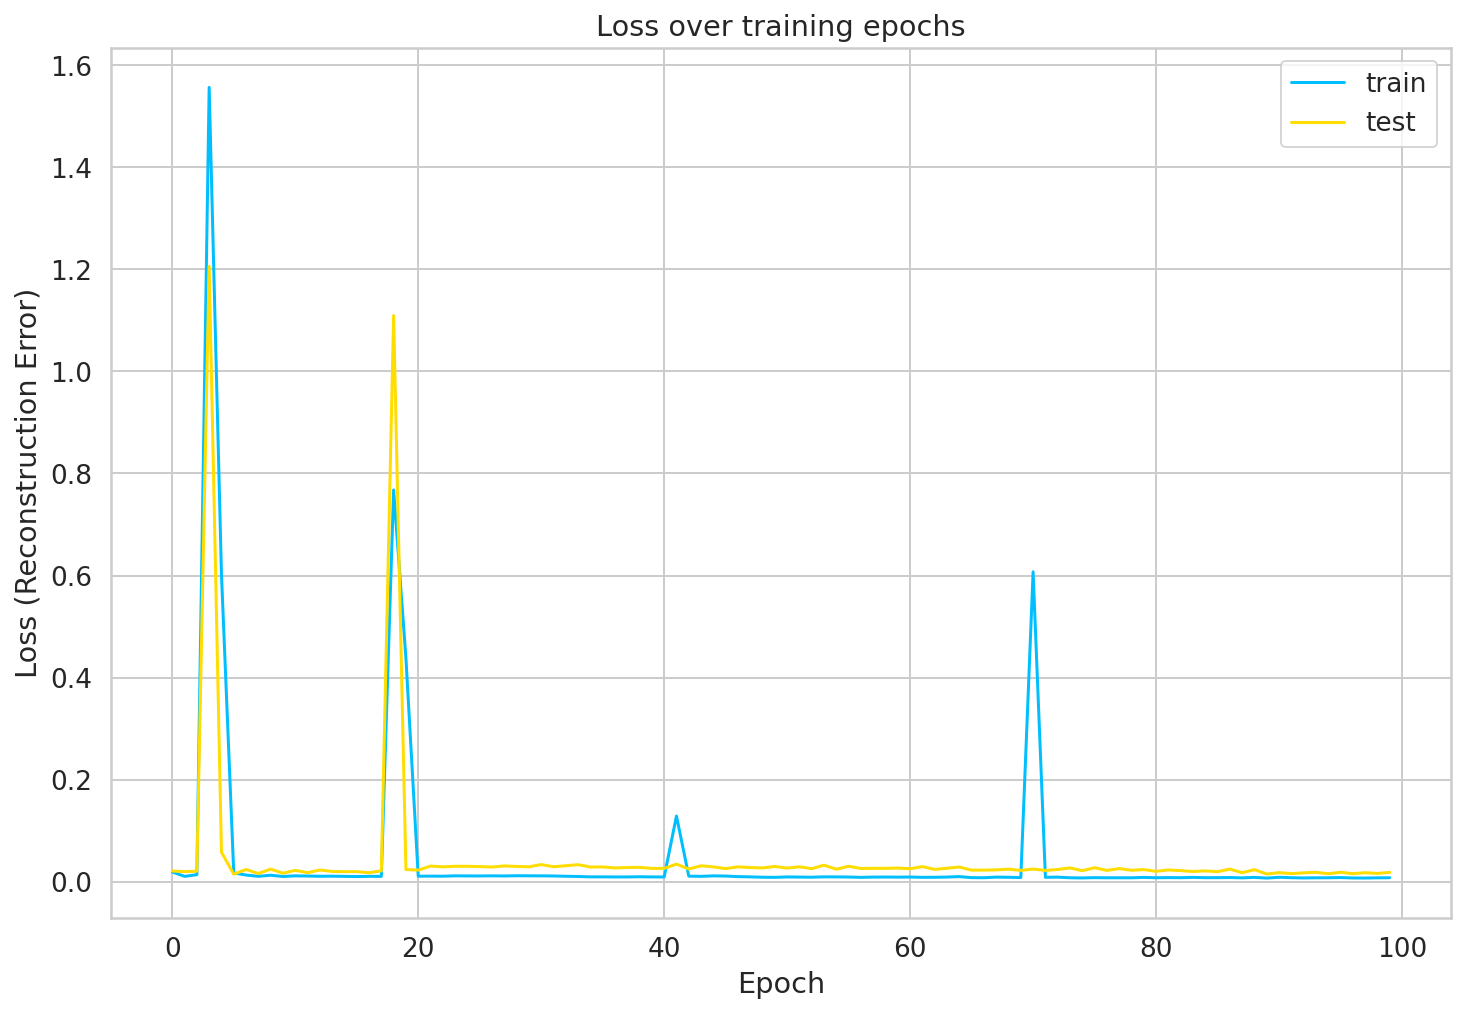

<Figure size 864x576 with 0 Axes>

In [48]:
ax = plt.figure().gca()

ax.plot(history['train'])
ax.plot(history['val'])
plt.ylabel('Loss (Reconstruction Error)')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show()
plt.savefig('image/model_onehot_x1data_MSE_epoch200.png', dpi =200)

In [41]:
model_path =  './models/model_onehot_x1data_MSE_epoch200.pth'
torch.save(model, model_path)

In [42]:
model = torch.load(model_path)

In [43]:
def predict(model, dataset):
    predictions, losses = [], []
    criterion = nn.MSELoss(reduction='mean').to(device)
    with torch.no_grad():
        model = model.eval()
        for seq_true in dataset:
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)
            loss = criterion(seq_pred, seq_true)
            predictions.append(seq_pred.cpu().numpy().flatten())
            losses.append(loss.item())
    return predictions, losses

In [44]:
THRESHOLD = 26
predictions, pred_losses = predict(model, test_normal_dataset)
sns.distplot(pred_losses, bins=50, kde=True);

NameError: name 'test_normal_dataset' is not defined

In [45]:
_, losses = predict(model, train_dataset)

sns.distplot(losses, bins=50, kde=True);

NameError: name 'train_dataset' is not defined